In [1]:
import matplotlib.pyplot as plt
import skimage.data
import numpy as np
import math
# Reading the image  
img =skimage.io.imread("/home/sneha/Downloads/dog.jpg")

In [2]:
#padding function
def padding(image,size):
    for i in range(size):
        image=np.insert(image, 0,0,axis=0)
        image=np.insert(image,0,image.shape[1],axis=0)
        image=np.insert(image, 0,0,axis=1)
        image=np.insert(image,0,image.shape[0],axis=1)
    return image

In [3]:
#function will give you a filter of specified size
def filters(num_filter,width,height,depth):
    l1_filter = np.random.random_integers(-1,2,size=(num_filter,width,height,depth))
    return l1_filter

In [4]:
#calculating the dimension of output feature map
def out_dimension(image,filters,stride,num_filters):
    r=(image.shape[0])-(filters.shape[1])
    t=(image.shape[1])-(filters.shape[2])
    out_size_x= int(math.floor(r/stride))+1
    out_size_y= int(math.floor(t/stride))+1
    out=np.zeros((num_filters,out_size_x,out_size_y))
    return out

In [5]:
def relu(feature_map):
    #Preparing the output of the ReLU activation function.  
    relu_out = np.zeros(feature_map.shape)
    for k in range(feature_map.shape[0]):
        for r in range(0,feature_map.shape[1]):  
            for c in range(0, feature_map.shape[2]):  
                relu_out[k][r][c] = max(feature_map[k][r][c], 0)  
    return relu_out

In [6]:
#convolving the filter over image and generating the output feature map
def convolution(image,filters,stride,pad_size,activation,num_fil):
        image= padding(image,pad_size)
        out_dim= out_dimension(image,filters,stride,num_fil)
        for k in range(num_fil):
            count_i=0
            for i in range(0,out_dim.shape[1]):
                count_j=0
                for j in range(0,out_dim.shape[2]):
                    temp=image[i+count_i:(i+(filters[k].shape[0])+count_i),j+count_j:(j+(filters[k].shape[1])+count_j),:]
                    temp_1=np.multiply(temp,filters[k])
                    temp_1=temp_1.reshape(-1)
                    z=np.sum(temp_1)
                    out_dim[k][i][j]=z
                    count_j=count_j+stride-1
                count_i=count_i+stride-1
        if(activation=='relu'):
            out= relu(out_dim)
            return out

/home/sneha/miniconda3/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(-1, 2 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


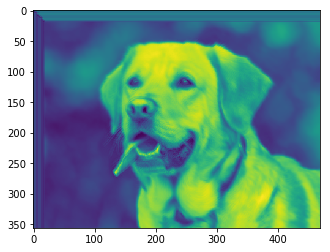

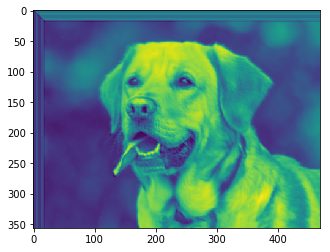

In [7]:
if __name__ == "__main__":
    image=img
    num_fil=2
    fil=filters(num_fil,5,5,3)
    stride=1
    pad_size=10
    activation='relu'
    out_dim= convolution(image,fil,stride,pad_size,activation,num_fil)
    for i in range(out_dim.shape[0]):
        plt.imshow(out_dim[i])
        plt.show()

    